In [223]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

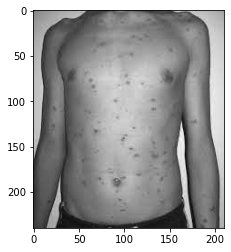

In [247]:
Datadir = "C:/Users/andre/Wor-Ease Away Datasets/"
Categories = ["Chickenpox", "Hf&m", "Measles", "Mumps", "Roseola", "Rubella", "Scarlet Fever", "Scd", "Skin"]

for Category in Categories:
    path = os.path.join(Datadir, Category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

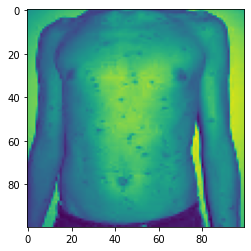

In [248]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show

In [249]:
training_data = []

def create_training_data():
    for Category in Categories:
        path = os.path.join(Datadir, Category)
        class_num = Categories.index(Category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE,3))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [250]:
import random

random.shuffle(training_data)

In [251]:
for sample in training_data[10:]:
    print(sample[1])

In [252]:
X = []
y = []

In [253]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [254]:
#pickle_out = open("x.pickle", "wb")
#pickle.dump = (X, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle", "wb")
#pickle.dump = (y, pickle_out)
#pickle_out.close()

In [255]:
#X = pickle.load(open("x.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))

#X = x/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy'])
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

In [256]:
tensor_x = tf.convert_to_tensor(x, dtype=None, dtype_hint=None, name=None)
tensor_y = tf.convert_to_tensor(y, dtype=None, dtype_hint=None, name=None)

In [257]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.